In [67]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk
from nltk import WordNetLemmatizer
from nltk import PorterStemmer
from tqdm import tqdm
from sklearn.manifold import TSNE

In [19]:
df = pd.read_csv('updated_hate_speech2.csv').drop(['Content_int', 'Unnamed: 0', 'Label'], axis=1)
df.head()

,Content
0,denial of normal the con be asked to comment o...
1,just by being able to tweet this insufferable ...
2,that is retarded you too cute to be single tha...
3,thought of a real badass mongol style declarat...
4,afro american basho


In [ ]:
X = df['Content'].values
# This data is partially cleaned already. It is lowercased, and the punctuation is removed
# We decided to also lemmatize and tokenize 
# to make it easier for our models to find the patterns and tokenized
nltk.download('wordnet')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
# This goes through every sentence and tokenizes and lemmatizes them
def tokenize_and_lemmatize(sentence):
    # Tokenize each sentence -> words
    words = sentence.split()
    # Word -> base form
    lemmas = [stemmer.stem(word) for word in words]
    lemma_sentence = ' '.join(lemmas)
    return lemma_sentence

X_tokenized = [tokenize_and_lemmatize(sentence) for sentence in tqdm(X)]
X_tokenized

In [54]:
samples = [l.split() for l in X_tokenized]
samples[0]

['denial',
 'of',
 'normal',
 'the',
 'con',
 'be',
 'ask',
 'to',
 'comment',
 'on',
 'tragedi',
 'an',
 'emot',
 'retard']

In [55]:
EMBEDDINGS_SIZE = 100
embedding_model = Word2Vec(samples, vector_size=EMBEDDINGS_SIZE, min_count=1, workers=-1)
embedding_model.wv.save('custom_embeddings.wordvectors')

In [57]:
wv = KeyedVectors.load('custom_embeddings.wordvectors')
print(f'Vocab size: {len(wv)}')

Vocab size: 65871


In [77]:
wv.most_similar('dog')

[('imageqaoom', 0.4417974352836609),
 ('wpagf', 0.4027644097805023),
 ('userjackwen', 0.3734257221221924),
 ('trenton', 0.3707987368106842),
 ('apparantli', 0.3669455051422119),
 ('proud', 0.3651086091995239),
 ('peshmerga', 0.36450186371803284),
 ('minut', 0.3643779456615448),
 ('wealth', 0.35475096106529236),
 ('perussuomalaiset', 0.35262545943260193)]

In [80]:
wv.most_similar('six')

[('wpwikibreak', 0.4436461627483368),
 ('wto', 0.40249818563461304),
 ('jurgen', 0.3833950161933899),
 ('lightest', 0.3830544054508209),
 ('byc', 0.36241114139556885),
 ('blah', 0.36161839962005615),
 ('heteroseksualnosti', 0.3604702651500702),
 ('thiazolidinedion', 0.3591584265232086),
 ('brash', 0.356058269739151),
 ('elladara', 0.35211652517318726)]

In [87]:
wv.most_similar('obama')

[('lineback', 0.3975569009780884),
 ('ewwwwww', 0.3949255645275116),
 ('adduc', 0.3791316747665405),
 ('whyhasnthebeenimpeachedyet', 0.37908822298049927),
 ('jedg', 0.36273881793022156),
 ('educationforal', 0.35982608795166016),
 ('icd', 0.3594180643558502),
 ('maguir', 0.358946830034256),
 ('jackieteitelboim', 0.35635218024253845),
 ('tulu', 0.3484143316745758)]

In [74]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

def plot_tsne(wv):
    seed_words = list(wv.key_to_index.keys())
    seed_words = random.choices(seed_words, k=10)
    
    sim_words = []
    
    for word in seed_words:
        sim_words.append(word)
        similars = [i[0] for i in wv.most_similar(word)]
        sim_words.extend(similars)
        
    vectors = wv.vectors_for_all(sim_words).vectors
    
    tsne = TSNE(n_jobs=-1, perplexity=10)
    transformed = tsne.fit_transform(vectors)

    x = [i[0] for i in transformed]
    y = [i[1] for i in transformed]
    
    plt.figure(figsize=(10,10))
    for i in tqdm(range(len(x))):
        if sim_words[i] in seed_words:
            plt.scatter(x[i],y[i],c='b')
        else:
            plt.scatter(x[i],y[i],c='r')
        plt.annotate(sim_words[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

100%|███████████████████████████████████████| 110/110 [00:00<00:00, 1300.87it/s]


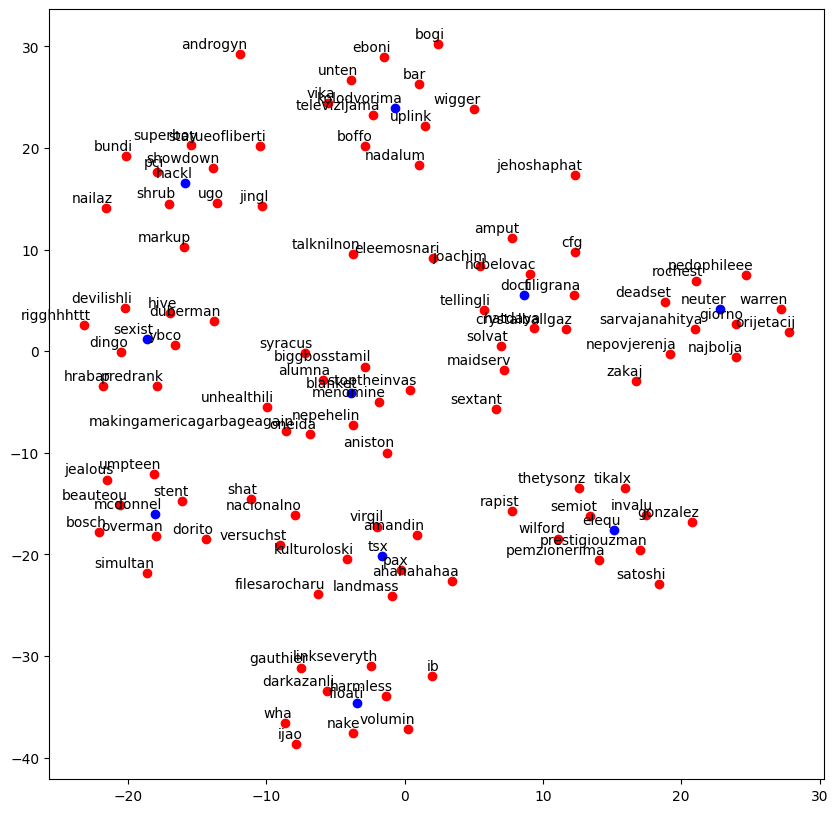

In [75]:
plot_tsne(wv)